<a href="https://colab.research.google.com/github/rennydoig/ssc22-case-comp/blob/main/Daisy_dir/Heat_Map_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import csv
!pip install geopandas rtree
import geopandas as gpd
from shapely.geometry import Polygon
from shapely.ops import unary_union
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import pickle
import datetime
!pip install pysal contextily &> /dev/null
!pip install pandana
import matplotlib.pyplot as plt
import seaborn
from pysal.viz import splot
from splot.esda import plot_moran
import contextily
from pysal.explore import esda
from pysal.lib import weights
drive.mount('/content/drive')

In [52]:
os.chdir('/content/drive/MyDrive/2022 SSC Case Study/')
pred_d_ens = pd.read_csv('pred_download_ENS_2019_2030.csv')
pred_u_ens = pd.read_csv('pred_upload_ENS_2019_2030.csv')

# Merge with boundary data
os.chdir('/content/drive/MyDrive/2022 SSC Case Study/dataset/')
dat_path = './boundaries/statcan-census-division/statcan-census-division.shp'
boundary_dat = gpd.read_file(dat_path)
boundary_dat['CDUID'] = boundary_dat['CDUID'].astype(int)

In [53]:
colnames=list(pred_u_ens.columns)[5:53]
for col in colnames:
  s = col + '_class'
  pred_d_ens[s] = [int(p >= 50) for p in pred_d_ens[col]]
  pred_u_ens[s] = [int(p >= 10) for p in pred_u_ens[col]]

## Download speed 



### Fixed connection type

#### Rural vs Urban

Text(0.5, 1.0, 'Committment for download speed (mbps) of RURAL in 2030-Q1')

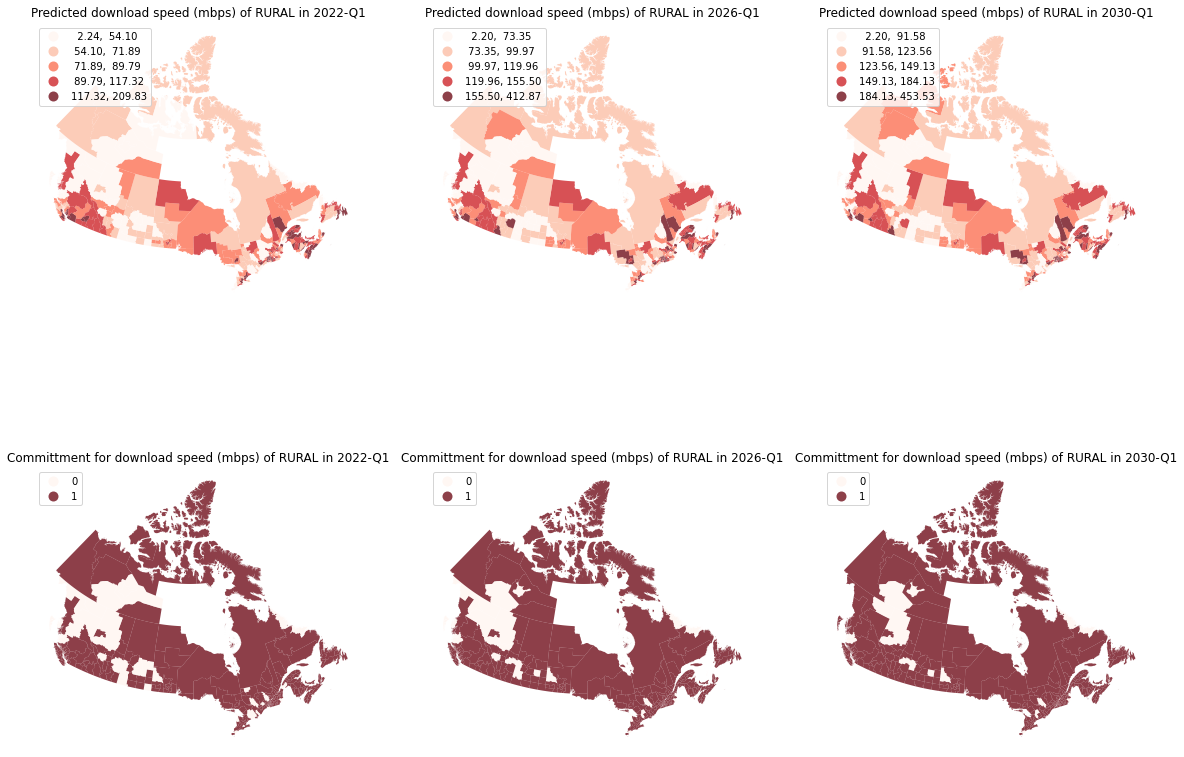

In [54]:
# Rural
dat_rural = pred_d_ens[(pred_d_ens['conn_type']=='fixed') & (pred_d_ens['is_rural']==True)]
dat_rural = dat_rural.groupby(by='CDUID',as_index=False).mean()
dat_rural = pd.merge(dat_rural, boundary_dat, on='CDUID', how='left')
dat_rural = gpd.GeoDataFrame(dat_rural, geometry='geometry', crs="EPSG:4326")
colnames=list(pred_d_ens.columns)[5:53]
for col in colnames:
  s = col + '_class'
  dat_rural[s] = [int(p >= 50) for p in dat_rural[col]]

f, axs = plt.subplots(2,3, figsize=(20,15))
[ax1, ax2, ax3], [ax4, ax5, ax6] = axs
# Rural 2022Q1
dat_rural.plot(column = '2022Q1',cmap='Reds',scheme='quantiles',k=5,edgecolor='white',linewidth=0.,alpha=0.75,legend=True,legend_kwds={'loc':2},ax=ax1)
ax1.set_axis_off()
ax1.set_title("Predicted download speed (mbps) of RURAL in 2022-Q1")
# Rural 2026Q1
dat_rural.plot(column = '2026Q1',cmap='Reds',scheme='quantiles',k=5,edgecolor='white',linewidth=0.,alpha=0.75,legend=True,legend_kwds={'loc':2},ax=ax2)
ax2.set_axis_off()
ax2.set_title("Predicted download speed (mbps) of RURAL in 2026-Q1")
# Rural 2030Q1
dat_rural.plot(column = '2030Q1',cmap='Reds',scheme='quantiles',k=5,edgecolor='white',linewidth=0.,alpha=0.75,legend=True,legend_kwds={'loc':2},ax=ax3)
ax3.set_axis_off()
ax3.set_title("Predicted download speed (mbps) of RURAL in 2030-Q1")

# Committment Rural 2022Q1
dat_rural.plot(column = '2022Q1_class',cmap='Reds',edgecolor='white',linewidth=0.,alpha=0.75,legend=True,legend_kwds={'loc':2},categorical=True,ax=ax4)
ax4.set_axis_off()
ax4.set_title("Committment for download speed (mbps) of RURAL in 2022-Q1")
# Committment Rural 2026Q1
dat_rural.plot(column = '2026Q1_class',cmap='Reds',edgecolor='white',linewidth=0.,alpha=0.75,legend=True,legend_kwds={'loc':2},categorical=True,ax=ax5)
ax5.set_axis_off()
ax5.set_title("Committment for download speed (mbps) of RURAL in 2026-Q1")
# Committment Rural 2030Q1
dat_rural.plot(column = '2030Q1_class',cmap='Reds',edgecolor='white',linewidth=0.,alpha=0.75,legend=True,legend_kwds={'loc':2},categorical=True,ax=ax6)
ax6.set_axis_off()
ax6.set_title("Committment for download speed (mbps) of RURAL in 2030-Q1")

Text(0.5, 1.0, 'Committment for download speed (mbps) of URBAN in 2030-Q1')

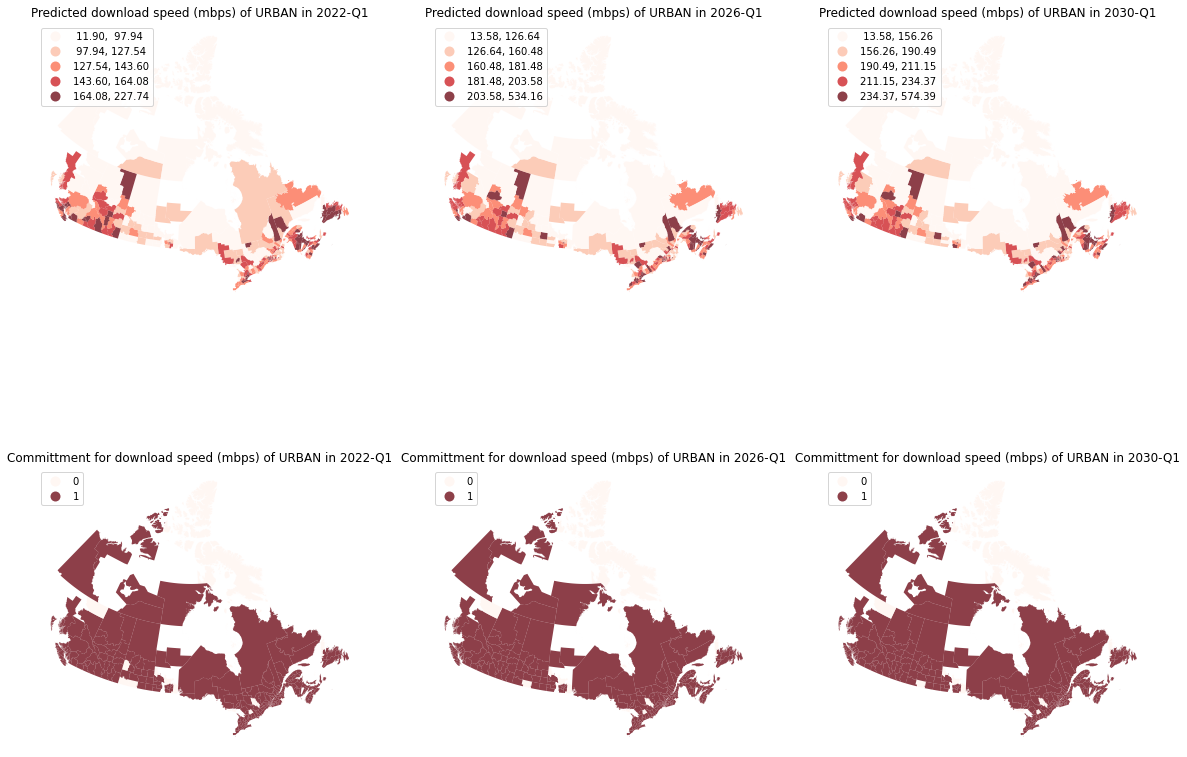

In [55]:
# Urban
dat_urban = pred_d_ens[(pred_d_ens['conn_type']=='fixed') & (pred_d_ens['is_rural']==False)]
dat_urban = dat_urban.groupby(by='CDUID',as_index=False).mean()
dat_urban = pd.merge(dat_urban, boundary_dat, on='CDUID', how='left')
dat_urban = gpd.GeoDataFrame(dat_urban, geometry='geometry', crs="EPSG:4326")
colnames=list(pred_d_ens.columns)[5:53]
for col in colnames:
  s = col + '_class'
  dat_urban[s] = [int(p >= 50) for p in dat_urban[col]]

f, axs = plt.subplots(2,3, figsize=(20,15))
[ax1, ax2, ax3], [ax4, ax5, ax6] = axs
# Urban 2022Q1
dat_urban.plot(column = '2022Q1',cmap='Reds',scheme='quantiles',k=5,edgecolor='white',linewidth=0.,alpha=0.75,legend=True,legend_kwds={'loc':2},ax=ax1)
ax1.set_axis_off()
ax1.set_title("Predicted download speed (mbps) of URBAN in 2022-Q1")
# Urban 2026Q1
dat_urban.plot(column = '2026Q1',cmap='Reds',scheme='quantiles',k=5,edgecolor='white',linewidth=0.,alpha=0.75,legend=True,legend_kwds={'loc':2},ax=ax2)
ax2.set_axis_off()
ax2.set_title("Predicted download speed (mbps) of URBAN in 2026-Q1")
# Urban 2030Q1
dat_urban.plot(column = '2030Q1',cmap='Reds',scheme='quantiles',k=5,edgecolor='white',linewidth=0.,alpha=0.75,legend=True,legend_kwds={'loc':2},ax=ax3)
ax3.set_axis_off()
ax3.set_title("Predicted download speed (mbps) of URBAN in 2030-Q1")
# Committment Urban 2022Q1
dat_urban.plot(column = '2022Q1_class',cmap='Reds',edgecolor='white',linewidth=0.,alpha=0.75,legend=True,legend_kwds={'loc':2},categorical=True,ax=ax4)
ax4.set_axis_off()
ax4.set_title("Committment for download speed (mbps) of URBAN in 2022-Q1")
# Committment Urban 2026Q1
dat_urban.plot(column = '2026Q1_class',cmap='Reds',edgecolor='white',linewidth=0.,alpha=0.75,legend=True,legend_kwds={'loc':2},categorical=True,ax=ax5)
ax5.set_axis_off()
ax5.set_title("Committment for download speed (mbps) of URBAN in 2026-Q1")
# Committment Urban 2030Q1
dat_urban.plot(column = '2030Q1_class',cmap='Reds',edgecolor='white',linewidth=0.,alpha=0.75,legend=True,legend_kwds={'loc':2},categorical=True,ax=ax6)
ax6.set_axis_off()
ax6.set_title("Committment for download speed (mbps) of URBAN in 2030-Q1")

#### Difference between 2022Q1 and 2030Q1

Text(0.5, 1.0, 'Difference of download speed (mbps) of URBAN between 2022-Q1 and 2030-Q1')

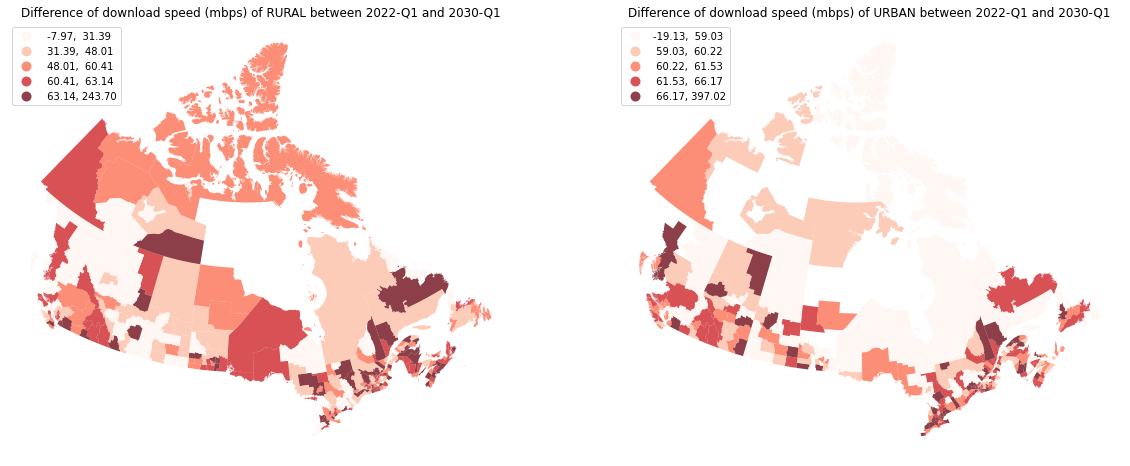

In [41]:
dat_rural['diff'] = dat_rural['2030Q1'] - dat_rural['2022Q1']
dat_urban['diff'] = dat_urban['2030Q1'] - dat_urban['2022Q1']

f, axs = plt.subplots(1,2, figsize=(20,15))
[ax1, ax2] = axs
# Rural 
dat_rural.plot(column = 'diff',cmap='Reds',scheme='quantiles',k=5,edgecolor='white',linewidth=0.,alpha=0.75,legend=True,legend_kwds={'loc':2},ax=ax1)
ax1.set_axis_off()
ax1.set_title("Difference of download speed (mbps) of RURAL between 2022-Q1 and 2030-Q1")
# Urban 
dat_urban.plot(column = 'diff',cmap='Reds',scheme='quantiles',k=5,edgecolor='white',linewidth=0.,alpha=0.75,legend=True,legend_kwds={'loc':2},ax=ax2)
ax2.set_axis_off()
ax2.set_title("Difference of download speed (mbps) of URBAN between 2022-Q1 and 2030-Q1")

### Mobile connection type

#### Rural vs Urban

Text(0.5, 1.0, 'Committment for download speed (mbps) of RURAL in 2030-Q1')

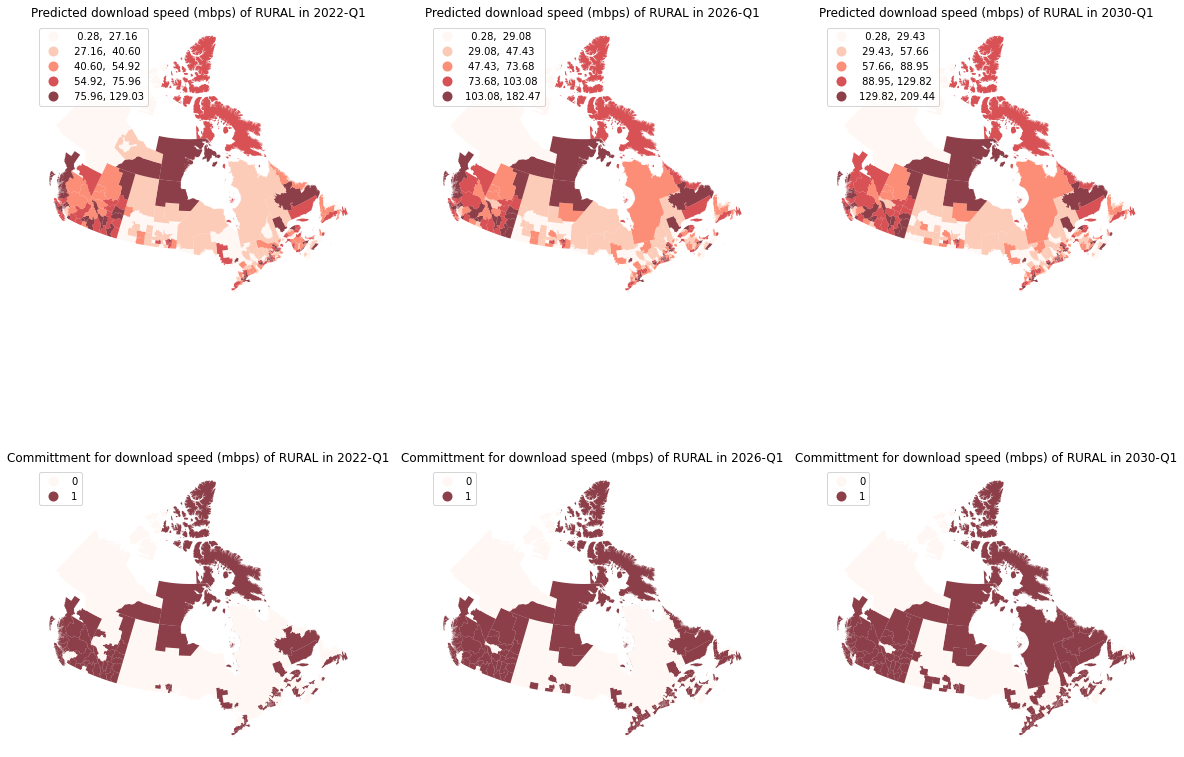

In [49]:
# Rural
dat_rural = pred_d_ens[(pred_d_ens['conn_type']=='mobile') & (pred_d_ens['is_rural']==True)]
dat_rural = dat_rural.groupby(by='CDUID',as_index=False).mean()
dat_rural = pd.merge(dat_rural, boundary_dat, on='CDUID', how='left')
dat_rural = gpd.GeoDataFrame(dat_rural, geometry='geometry', crs="EPSG:4326")
colnames=list(pred_d_ens.columns)[5:53]
for col in colnames:
  s = col + '_class'
  dat_rural[s] = [int(p >= 50) for p in dat_rural[col]]

f, axs = plt.subplots(2,3, figsize=(20,15))
[ax1, ax2, ax3], [ax4, ax5, ax6] = axs
# Rural 2022Q1
dat_rural.plot(column = '2022Q1',cmap='Reds',scheme='quantiles',k=5,edgecolor='white',linewidth=0.,alpha=0.75,legend=True,legend_kwds={'loc':2},ax=ax1)
ax1.set_axis_off()
ax1.set_title("Predicted download speed (mbps) of RURAL in 2022-Q1")
# Rural 2026Q1
dat_rural.plot(column = '2026Q1',cmap='Reds',scheme='quantiles',k=5,edgecolor='white',linewidth=0.,alpha=0.75,legend=True,legend_kwds={'loc':2},ax=ax2)
ax2.set_axis_off()
ax2.set_title("Predicted download speed (mbps) of RURAL in 2026-Q1")
# Rural 2030Q1
dat_rural.plot(column = '2030Q1',cmap='Reds',scheme='quantiles',k=5,edgecolor='white',linewidth=0.,alpha=0.75,legend=True,legend_kwds={'loc':2},ax=ax3)
ax3.set_axis_off()
ax3.set_title("Predicted download speed (mbps) of RURAL in 2030-Q1")

# Committment Rural 2022Q1
dat_rural.plot(column = '2022Q1_class',cmap='Reds',edgecolor='white',linewidth=0.,alpha=0.75,legend=True,legend_kwds={'loc':2},categorical=True,ax=ax4)
ax4.set_axis_off()
ax4.set_title("Committment for download speed (mbps) of RURAL in 2022-Q1")
# Committment Rural 2026Q1
dat_rural.plot(column = '2026Q1_class',cmap='Reds',edgecolor='white',linewidth=0.,alpha=0.75,legend=True,legend_kwds={'loc':2},categorical=True,ax=ax5)
ax5.set_axis_off()
ax5.set_title("Committment for download speed (mbps) of RURAL in 2026-Q1")
# Committment Rural 2030Q1
dat_rural.plot(column = '2030Q1_class',cmap='Reds',edgecolor='white',linewidth=0.,alpha=0.75,legend=True,legend_kwds={'loc':2},categorical=True,ax=ax6)
ax6.set_axis_off()
ax6.set_title("Committment for download speed (mbps) of RURAL in 2030-Q1")

Text(0.5, 1.0, 'Committment for download speed (mbps) of RURAL in 2030-Q1')

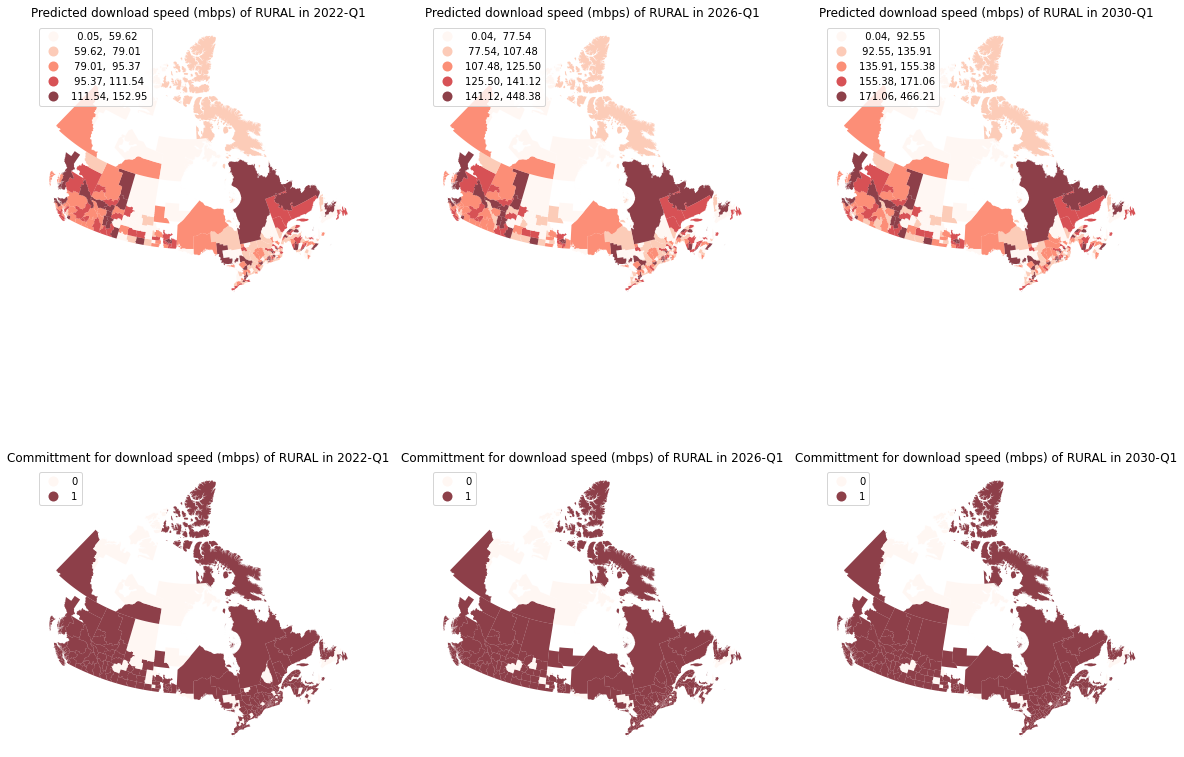

In [50]:
# Urban
dat_rural = pred_d_ens[(pred_d_ens['conn_type']=='mobile') & (pred_d_ens['is_rural']==False)]
dat_rural = dat_rural.groupby(by='CDUID',as_index=False).mean()
dat_rural = pd.merge(dat_rural, boundary_dat, on='CDUID', how='left')
dat_rural = gpd.GeoDataFrame(dat_rural, geometry='geometry', crs="EPSG:4326")
colnames=list(pred_d_ens.columns)[5:53]
for col in colnames:
  s = col + '_class'
  dat_rural[s] = [int(p >= 50) for p in dat_rural[col]]

f, axs = plt.subplots(2,3, figsize=(20,15))
[ax1, ax2, ax3], [ax4, ax5, ax6] = axs
# Rural 2022Q1
dat_rural.plot(column = '2022Q1',cmap='Reds',scheme='quantiles',k=5,edgecolor='white',linewidth=0.,alpha=0.75,legend=True,legend_kwds={'loc':2},ax=ax1)
ax1.set_axis_off()
ax1.set_title("Predicted download speed (mbps) of RURAL in 2022-Q1")
# Rural 2026Q1
dat_rural.plot(column = '2026Q1',cmap='Reds',scheme='quantiles',k=5,edgecolor='white',linewidth=0.,alpha=0.75,legend=True,legend_kwds={'loc':2},ax=ax2)
ax2.set_axis_off()
ax2.set_title("Predicted download speed (mbps) of RURAL in 2026-Q1")
# Rural 2030Q1
dat_rural.plot(column = '2030Q1',cmap='Reds',scheme='quantiles',k=5,edgecolor='white',linewidth=0.,alpha=0.75,legend=True,legend_kwds={'loc':2},ax=ax3)
ax3.set_axis_off()
ax3.set_title("Predicted download speed (mbps) of RURAL in 2030-Q1")

# Committment Rural 2022Q1
dat_rural.plot(column = '2022Q1_class',cmap='Reds',edgecolor='white',linewidth=0.,alpha=0.75,legend=True,legend_kwds={'loc':2},categorical=True,ax=ax4)
ax4.set_axis_off()
ax4.set_title("Committment for download speed (mbps) of RURAL in 2022-Q1")
# Committment Rural 2026Q1
dat_rural.plot(column = '2026Q1_class',cmap='Reds',edgecolor='white',linewidth=0.,alpha=0.75,legend=True,legend_kwds={'loc':2},categorical=True,ax=ax5)
ax5.set_axis_off()
ax5.set_title("Committment for download speed (mbps) of RURAL in 2026-Q1")
# Committment Rural 2030Q1
dat_rural.plot(column = '2030Q1_class',cmap='Reds',edgecolor='white',linewidth=0.,alpha=0.75,legend=True,legend_kwds={'loc':2},categorical=True,ax=ax6)
ax6.set_axis_off()
ax6.set_title("Committment for download speed (mbps) of RURAL in 2030-Q1")

#### Difference between 2022Q1 and 2030Q1

Text(0.5, 1.0, 'Difference of download speed (mbps) of URBAN between 2022-Q1 and 2030-Q1')

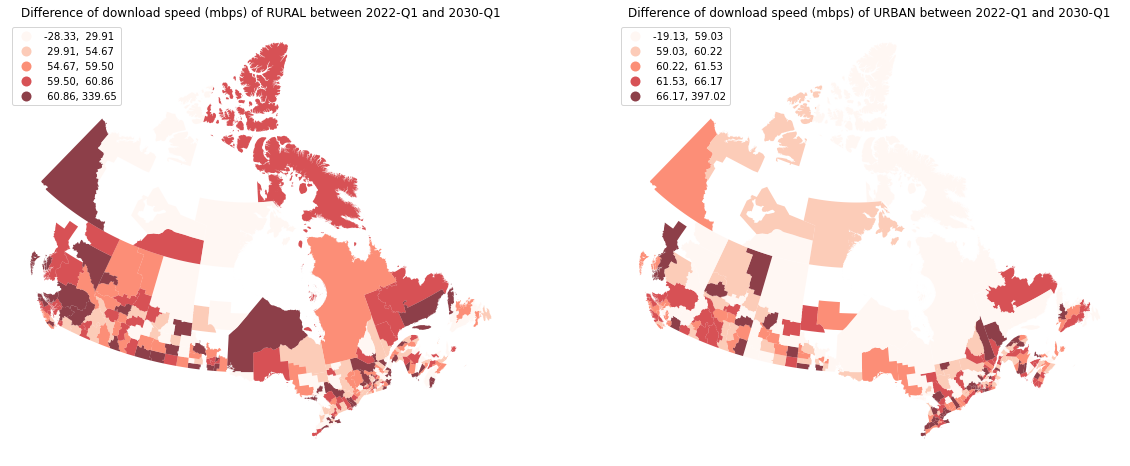

In [51]:
dat_rural['diff'] = dat_rural['2030Q1'] - dat_rural['2022Q1']
dat_urban['diff'] = dat_urban['2030Q1'] - dat_urban['2022Q1']

f, axs = plt.subplots(1,2, figsize=(20,15))
[ax1, ax2] = axs
# Rural 2030Q1 - 2022Q1
dat_rural.plot(column = 'diff',cmap='Reds',scheme='quantiles',k=5,edgecolor='white',linewidth=0.,alpha=0.75,legend=True,legend_kwds={'loc':2},ax=ax1)
ax1.set_axis_off()
ax1.set_title("Difference of download speed (mbps) of RURAL between 2022-Q1 and 2030-Q1")
# Urban 2030Q1 - 2022Q1
dat_urban.plot(column = 'diff',cmap='Reds',scheme='quantiles',k=5,edgecolor='white',linewidth=0.,alpha=0.75,legend=True,legend_kwds={'loc':2},ax=ax2)
ax2.set_axis_off()
ax2.set_title("Difference of download speed (mbps) of URBAN between 2022-Q1 and 2030-Q1")